In [4]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [62]:
import geopandas as gpd
from shapely.geometry import Point
from itertools import combinations
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn.cluster import KMeans


# 读取.shp文件
shp_path = './LeedsCase/LeedsWards.shp'  # 请替换为你的.shp文件路径
gdf = gpd.read_file(shp_path)
# 生成每个小区域的质心
gdf['centroid'] = gdf['geometry'].centroid
# 添加一个名为 index 的新列
gdf['index'] = gdf.index+1
gdf.head()


,name,WardCode,Locality,TotalPop,PoorHealth,PercPoorHe,FTStudents,PercFTStud,Aged20_24,PercAged20,...,AsianPop,PercAsianP,BlackPop,PercBlackP,Christian,PercChrist,wardarea,geometry,centroid,index
0,Adel and Wharfedale,E05001411,North,19430,786,4.05,535,2.75,751,3.87,...,992,5.11,174,0.90,12614,64.92,2.923222e+07,"POLYGON ((429495.301 445295.799, 429481.901 44...",POINT (425940.130 442831.583),1
1,Alwoodley,E05001412,North,22766,1142,5.02,747,3.28,1063,4.67,...,3182,13.98,638,2.80,10807,47.47,1.970235e+07,"POLYGON ((428976.200 443726.900, 428975.100 44...",POINT (429916.961 441140.694),2
2,Ardsley and Robin Hood,E05001413,South,22204,1005,4.53,509,2.29,1181,5.32,...,480,2.16,139,0.63,13870,62.47,1.794158e+07,"POLYGON ((434340.701 425834.900, 434328.900 42...",POINT (430501.666 425803.306),3
3,Armley,E05001414,West,25550,1614,6.32,690,2.70,2133,8.35,...,1933,7.57,793,3.10,13243,51.83,6.076271e+06,"POLYGON ((427898.999 434093.499, 427900.300 43...",POINT (426369.328 434034.125),4
4,Beeston and Holbeck,E05001415,West,22187,1506,6.79,665,3.00,1620,7.30,...,2341,10.55,1223,5.51,11811,53.23,7.299516e+06,"POLYGON ((430127.801 429939.299, 430136.300 42...",POINT (428576.593 431029.833),5


In [63]:
# 创建一个字典，将 DataFrame 转换为字典
centroid_dict = gdf.set_index('index')['centroid'].to_dict()

# 将字典放入一个列表
centroid_list = [{code:coords} for code, coords in centroid_dict.items()]

# 打印封装后的列表
# print(centroid_list[0])
centroid_dict 


{1: <POINT (425940.13 442831.583)>,
 2: <POINT (429916.961 441140.694)>,
 3: <POINT (430501.666 425803.306)>,
 4: <POINT (426369.328 434034.125)>,
 5: <POINT (428576.593 431029.833)>,
 6: <POINT (423824.157 435620.749)>,
 7: <POINT (432718.708 432644.586)>,
 8: <POINT (420925.551 435694.866)>,
 9: <POINT (430456.46 436318.38)>,
 10: <POINT (430843.171 431996.361)>,
 11: <POINT (437047.923 436058.296)>,
 12: <POINT (425479.173 431747.631)>,
 13: <POINT (439375.145 431366.17)>,
 14: <POINT (432819.523 435172.577)>,
 15: <POINT (417851.06 442220.858)>,
 16: <POINT (437557.483 441268.292)>,
 17: <POINT (442841.895 429597.744)>,
 18: <POINT (426285.458 436166.065)>,
 19: <POINT (430450.138 428718.343)>,
 20: <POINT (429723.486 438134.161)>,
 21: <POINT (424798.7 429032.959)>,
 22: <POINT (426392.755 426624.963)>,
 23: <POINT (421244.799 443584.141)>,
 24: <POINT (422040.26 432829.487)>,
 25: <POINT (435524.268 427878.719)>,
 26: <POINT (428085.644 435795.118)>,
 27: <POINT (422807.238 43844

In [28]:

# # 计算质心之间的距离并赋值给d_vv
# d_vv = {}
# combinations_list = list(combinations(gdf['WardCode'], 2))
# for v1, v2 in combinations_list:
#     point1 = gdf[gdf['WardCode'] == v1]['centroid'].iloc[0]
#     point2 = gdf[gdf['WardCode'] == v2]['centroid'].iloc[0]
#     distance = euclidean((point1.x, point1.y), (point2.x, point2.y))
#     d_vv[(v1, v2)] = distance
#     d_vv[(v2, v1)] = distance

In [68]:
#通过K-means聚类确定选票中心位置


# 将质心坐标转换为数组
centroids = np.array([(point.x, point.y) for point in gdf['centroid']])

# 指定要选择的质心数量 n
n = 5

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=n, init=centroids[:n], n_init=1)  # 使用前 n 个质心作为初始值
gdf['cluster'] = kmeans.fit_predict(centroids)

# 打印每个聚类中心的坐标
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i+1} Centroid: {centroid}")

# 打印每个质心到选中质心的距离总和
# print("Total Distance to Selected Centroids:", kmeans.inertia_)

Cluster 1 Centroid: [421960.80668708 441769.22464959]
Cluster 2 Centroid: [435827.21950555 439569.63801924]
Cluster 3 Centroid: [438381.95740083 430412.41887855]
Cluster 4 Centroid: [425410.94836713 434716.57215993]
Cluster 5 Centroid: [430233.75291303 431463.83766728]


In [69]:
#确定聚类中心区域代码


from scipy.spatial.distance import euclidean

# 定义函数，找到距离某个点最近的质心
def find_nearest_centroid(point, centroids):
    min_distance = float('inf')
    nearest_centroid = None
    for i, centroid in enumerate(centroids):
        distance = euclidean(point, centroid)
        if distance < min_distance:
            min_distance = distance
            nearest_centroid = i
    return nearest_centroid

# 初始化一个空字典，用于存储每个聚类中心对应的区域代码
centroid_to_area = {}

# 对每个聚类中心，找到最近的质心，并根据质心找到对应的区域代码
for i, centroid in enumerate(kmeans.cluster_centers_):
    nearest_centroid_index = find_nearest_centroid(centroid, centroids)
    nearest_ward_code = gdf.iloc[nearest_centroid_index]['index']
    centroid_to_area[i] = nearest_ward_code

# 初始化一个空列表，用于存储每个聚类中心对应的区域代码
ward_indexs = []

# 对每个聚类中心，找到最近的质心，并根据质心找到对应的区域代码
for centroid_index, centroid in enumerate(kmeans.cluster_centers_):
    nearest_centroid_index = find_nearest_centroid(centroid, centroids)
    nearest_ward_code = gdf.iloc[nearest_centroid_index]['index']
    ward_indexs.append(nearest_ward_code)

# 打印结果
for i, ward_index in enumerate(ward_indexs):
    print(f"Cluster {i+1} Centroid corresponds to index: {ward_index}")


print(ward_indexs)


Cluster 1 Centroid corresponds to index: 23
Cluster 2 Centroid corresponds to index: 16
Cluster 3 Centroid corresponds to index: 13
Cluster 4 Centroid corresponds to index: 4
Cluster 5 Centroid corresponds to index: 10
[23, 16, 13, 4, 10]


In [70]:

#确定各区域到聚类中心距离
from scipy.spatial.distance import cdist

# 选择的聚类中心坐标
selected_centroids = kmeans.cluster_centers_

# 所有质心坐标
all_centroids = np.array([(point.x, point.y) for point in gdf['centroid']])

# 计算所有聚类中心到其他剩下所有质心的距离矩阵
d_iv = cdist(selected_centroids, all_centroids, metric='euclidean')

# 打印距离矩阵
print("Distance Matrix (d_vv):")
print(d_iv)
print(d_iv.shape)

Distance Matrix (d_vv):
[[ 4118.69149227  7980.94195199 18106.81784579  8903.19171058
  12613.61048233  6424.62679931 14106.43390886  6161.94698872
  10093.95055077 13206.25775546 16131.82549602 10621.26400289
  20285.03709383 12705.41170665  4134.48775005 15604.71836068
  24169.50133051  7077.99472777 15569.01584191  8571.63219773
  13048.60557052 15779.44311543  1951.04807581  8940.09026766
  19414.26333921  8555.90868373  3434.83262899 10108.14873603
  14314.69666644 11599.120645   16476.38005464  5890.82123634
  21061.96372858]
 [10411.28333441  6115.50312915 14760.53603078 10958.72364923
  11202.67176703 12635.95030134  7590.73051842 15397.19361329
   6278.19518337  9066.16030936  3717.47735488 12971.73351397
   8937.82217452  5327.32443228 18170.61561116  2424.71334791
  12191.97879478 10130.62271799 12110.47540601  6270.25944275
  15252.86354472 16017.91893353 15124.92090335 15346.33154361
  11694.84325887  8612.72276606 13068.86723642  8009.03706358
   3928.51195237  3560.71097

In [84]:
#分区

'''城镇规模案例'''
from pulp import LpProblem, LpMinimize, lpSum, LpVariable, value

def solve_region_assignment(tau, V, V_c, q_v, d_iv, s_v):
    p = n # 中心的数量
    mu = sum(s_v.values()) / p  # 平均面积大小

    # 定义Lp问题
    prob = LpProblem("RegionAssignment", LpMinimize)

    # 定义变量 x_iv
    x = {(v, i): LpVariable(f'x_{v}_{i}', 0, 1, LpVariable.isBinary) for v in V for i in V_c}

    # 定义目标函数
    prob += lpSum(q_v[v] * d_iv[v, i] * x[v, i] for v in V for i in V_c)

    # 定义约束条件
    for v in V:
        prob += lpSum(x[v, i] for i in V_c) == 1

    for i in V_c:
        prob += (1 - tau) * mu <= lpSum(s_v[v] * x[v, i] for v in V) <= (1 + tau) * mu

    # 求解问题
    prob.solve()

    # 输出结果
    status = prob.status
    total_distance = value(prob.objective)

    # 输出每个基本区域被分配给哪个中心
    assignments = {v: [i for i in V_c if value(x[v, i]) == 1] for v in V}

    return status, total_distance, assignments



# 重新计算平均面积大小
# 获取totalpop和area属性
q_v = dict(zip(gdf['index'],gdf['TotalPop']))
s_v = dict(zip(gdf['index'],gdf.area))  # 使用 .area 计算多边形面积

print(q_v)
print(s_v)

V = gdf['index'].tolist()
V_c = ward_indexs
tau = 0.1

d_iv = d_iv

{1: 19430, 2: 22766, 3: 22204, 4: 25550, 5: 22187, 6: 21334, 7: 24843, 8: 22594, 9: 23536, 10: 33705, 11: 22099, 12: 24213, 13: 19811, 14: 27078, 15: 22347, 16: 18363, 17: 21116, 18: 21709, 19: 26228, 20: 22792, 21: 22692, 22: 21748, 23: 22233, 24: 22408, 25: 20354, 26: 20533, 27: 21506, 28: 25914, 29: 23749, 30: 22546, 31: 21543, 32: 22375, 33: 19979}
{1: 29209399.99252934, 2: 19687072.81049757, 3: 17927683.223798543, 4: 6071529.9764964, 5: 7293842.79694226, 6: 6408081.707457468, 7: 8678868.31745075, 8: 13220302.28758015, 9: 5264711.049426268, 10: 12391967.77100003, 11: 10916436.660880797, 12: 12404974.765234258, 13: 28822540.23511707, 14: 3992366.3927822416, 15: 20441292.834847156, 16: 109187719.10763602, 17: 42021541.69237364, 18: 5353517.979017193, 19: 9425505.545215718, 20: 5606840.975838821, 21: 13339662.786070975, 22: 12957948.115882691, 23: 23588496.75328456, 24: 9501658.943374865, 25: 20091172.470454928, 26: 2113995.089380561, 27: 11808211.780224347, 28: 3175743.053169364, 29:

In [83]:
q_v = dict(zip(gdf['index'],gdf['TotalPop']))
q_v

{1: 19430,
 2: 22766,
 3: 22204,
 4: 25550,
 5: 22187,
 6: 21334,
 7: 24843,
 8: 22594,
 9: 23536,
 10: 33705,
 11: 22099,
 12: 24213,
 13: 19811,
 14: 27078,
 15: 22347,
 16: 18363,
 17: 21116,
 18: 21709,
 19: 26228,
 20: 22792,
 21: 22692,
 22: 21748,
 23: 22233,
 24: 22408,
 25: 20354,
 26: 20533,
 27: 21506,
 28: 25914,
 29: 23749,
 30: 22546,
 31: 21543,
 32: 22375,
 33: 19979}

In [85]:
# 调用函数求解
status, total_distance, assignments = solve_region_assignment(tau, V, V_c, q_v, d_iv, s_v)

# 输出结果
print("Status:", status)
print("Total Distance:", total_distance)

# 输出每个基本区域被分配给哪个中心和区域面积
for i in V_c:
    total_area = sum(s_v[v] for v, assigned_centers in assignments.items() if i in assigned_centers)
    print(f"Total Area for Center {i}: {total_area}")

# 输出每个基本区域被分配给哪个中心和区域面积
for v, assigned_centers in assignments.items():
    print(f"Region {v} is assigned to Centers {assigned_centers}, Area: {s_v[v]}")

IndexError: index 5 is out of bounds for axis 0 with size 5

测试


In [52]:
from pulp import LpProblem, LpMinimize, lpSum, LpVariable, value
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import geopandas as gpd
import numpy as np
import pandas as pd

# 读取.shp文件
shp_path = './LeedsCase/LeedsWards.shp'  # 请替换为你的.shp文件路径
gdf = gpd.read_file(shp_path)

# 生成每个小区域的质心
gdf['centroid'] = gdf['geometry'].centroid

# 添加一个名为 index 的新列，索引值从1开始
gdf['index'] = gdf.index + 1

# 创建一个字典，将 DataFrame 转换为字典
centroid_dict = gdf.set_index('index')['centroid'].to_dict()

print(centroid_dict)


{1: <POINT (425940.13 442831.583)>, 2: <POINT (429916.961 441140.694)>, 3: <POINT (430501.666 425803.306)>, 4: <POINT (426369.328 434034.125)>, 5: <POINT (428576.593 431029.833)>, 6: <POINT (423824.157 435620.749)>, 7: <POINT (432718.708 432644.586)>, 8: <POINT (420925.551 435694.866)>, 9: <POINT (430456.46 436318.38)>, 10: <POINT (430843.171 431996.361)>, 11: <POINT (437047.923 436058.296)>, 12: <POINT (425479.173 431747.631)>, 13: <POINT (439375.145 431366.17)>, 14: <POINT (432819.523 435172.577)>, 15: <POINT (417851.06 442220.858)>, 16: <POINT (437557.483 441268.292)>, 17: <POINT (442841.895 429597.744)>, 18: <POINT (426285.458 436166.065)>, 19: <POINT (430450.138 428718.343)>, 20: <POINT (429723.486 438134.161)>, 21: <POINT (424798.7 429032.959)>, 22: <POINT (426392.755 426624.963)>, 23: <POINT (421244.799 443584.141)>, 24: <POINT (422040.26 432829.487)>, 25: <POINT (435524.268 427878.719)>, 26: <POINT (428085.644 435795.118)>, 27: <POINT (422807.238 438440.316)>, 28: <POINT (42934

In [66]:
# 将质心坐标转换为数组
centroids = np.array([(point.x, point.y) for point in gdf['centroid']])

# 指定要选择的质心数量 n
n = 5

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=n, init=centroids[:n], n_init=1)  # 使用前 n 个质心作为初始值
gdf['cluster'] = kmeans.fit_predict(centroids)

# 确定聚类中心区域代码
# 定义函数，找到距离某个点最近的质心
def find_nearest_centroid(point, centroids):
    min_distance = float('inf')
    nearest_centroid = None
    for i, centroid in enumerate(centroids):
        distance = euclidean(point, centroid)
        if distance < min_distance:
            min_distance = distance
            nearest_centroid = i
    return nearest_centroid

# 初始化一个空列表，用于存储每个聚类中心对应的区域代码
selected_centroids_indexs = []

# 对每个聚类中心，找到最近的质心，并根据质心找到对应的区域代码
for centroid_index, centroid in enumerate(kmeans.cluster_centers_):
    nearest_centroid_index = find_nearest_centroid(centroid, centroids)
    nearest_ward_code = gdf.iloc[nearest_centroid_index]['index']
    selected_centroids_indexs.append(nearest_ward_code)


# 确定各区域到聚类中心距离
# 选择的聚类中心坐标
selected_centroids = kmeans.cluster_centers_

# 所有质心坐标
all_centroids = np.array([(point.x, point.y) for point in gdf['centroid']])



# 计算所有聚类中心到其他剩下所有质心的距离矩阵
distance_iv = cdist(selected_centroids, all_centroids, metric='euclidean')


ddf = pd.DataFrame(distance_iv)
ddf.index = selected_centroids_indexs

ddf.columns = gdf['index'].tolist()
# 转换为字典形式
stacked = ddf.stack()
ddf_dict = stacked.to_dict()
# 构建新的字典，交换键的顺序
new_d_vi = {(j, i): value for (i, j), value in d_iv.items()}
new_d_vi

{(1, 23): 4118.691492271369,
 (2, 23): 7980.94195198816,
 (3, 23): 18106.817845788955,
 (4, 23): 8903.19171057744,
 (5, 23): 12613.610482328844,
 (6, 23): 6424.626799310271,
 (7, 23): 14106.433908856934,
 (8, 23): 6161.946988724234,
 (9, 23): 10093.950550768837,
 (10, 23): 13206.257755463292,
 (11, 23): 16131.825496021307,
 (12, 23): 10621.264002885724,
 (13, 23): 20285.03709383086,
 (14, 23): 12705.411706652803,
 (15, 23): 4134.487750048443,
 (16, 23): 15604.718360679832,
 (17, 23): 24169.50133051189,
 (18, 23): 7077.994727768661,
 (19, 23): 15569.01584191472,
 (20, 23): 8571.632197734556,
 (21, 23): 13048.605570516194,
 (22, 23): 15779.443115428054,
 (23, 23): 1951.0480758147987,
 (24, 23): 8940.090267664602,
 (25, 23): 19414.263339213234,
 (26, 23): 8555.908683729438,
 (27, 23): 3434.8326289890347,
 (28, 23): 10108.148736029314,
 (29, 23): 14314.696666438613,
 (30, 23): 11599.120645002473,
 (31, 23): 16476.380054641453,
 (32, 23): 5890.821236337405,
 (33, 23): 21061.963728575272,
 (

In [1]:
from pulp import *
# 定义函数，求解区域分配问题
def solve_region_assignment(tau, V, V_c, q_v, d_iv, s_v):
    p = n  # 中心的数量
    mu = sum(s_v.values()) / p  # 平均面积大小

    # 定义Lp问题
    prob = LpProblem("RegionAssignment", LpMinimize)

    # 定义变量 x_iv
    x = {(v, i): LpVariable(f'x_{v}_{i}', 0, 1, LpVariable.isBinary) for v in V for i in V_c}

    # 定义目标函数
    prob += lpSum(q_v[v] * d_iv[v, i] * x[v, i] for v in V for i in V_c)

    # 定义约束条件
    for v in V:
        prob += lpSum(x[v, i] for i in V_c) == 1

    for i in V_c:
        prob += (1 - tau) * mu <= lpSum(s_v[v] * x[v, i] for v in V) <= (1 + tau) * mu

    # 求解问题
    prob.solve()

    # 输出结果
    status = prob.status
    total_distance = pulp.value(prob.objective) 

    # 输出每个基本区域被分配给哪个中心
    assignments = {v: [i for i in V_c if value(x[v, i]) == 1] for v in V}

    return status, total_distance, assignments

# 重新计算平均面积大小
# 获取totalpop和area属性
q_v = dict(zip(gdf['index'], gdf['TotalPop']))
s_v = dict(zip(gdf['index'], gdf.area))  # 使用 .area 计算多边形面积

# 定义 V 和 V_c
V = gdf['index'].tolist()
V_c = selected_centroids_indexs
tau = 0.1
d_iv= new_d_vi

# 调用函数求解
status, total_distance, assignments = solve_region_assignment(tau, V, V_c, q_v, d_iv, s_v)

# 输出结果
print("Status:", status)
print("Total Distance:", total_distance)

# 输出每个基本区域被分配给哪个中心和区域面积
for i in V_c:
    total_area = sum(s_v[v] for v, assigned_centers in assignments.items() if i in assigned_centers)
    print(f"Total Area for Center {i}: {total_area}")

# 输出每个基本区域被分配给哪个中心和区域面积
for v, assigned_centers in assignments.items():
    print(f"Region {v} is assigned to Centers {assigned_centers}, Area: {s_v[v]}")


NameError: name 'gdf' is not defined

In [ ]:
测试2

In [25]:
from pulp import LpProblem, LpMinimize, lpSum, LpVariable, value
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取.shp文件
shp_path = './LeedsCase/LeedsWards.shp'  # 请替换为你的.shp文件路径
gdf = gpd.read_file(shp_path)

# 生成每个小区域的质心
gdf['centroid'] = gdf['geometry'].centroid

# 添加一个名为 index 的新列，索引值从1开始
gdf['index'] = gdf.index + 1

# 创建一个字典，将 DataFrame 转换为字典
centroid_dict = gdf.set_index('index')['centroid'].to_dict()

# print(centroid_dict)


# 将质心坐标转换为数组
centroids = np.array([(point.x, point.y) for point in gdf['centroid']])

# 指定要选择的质心数量 n
n = 2

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=n, init=centroids[:n], n_init=1)  # 使用前 n 个质心作为初始值
gdf['cluster'] = kmeans.fit_predict(centroids)

# 确定聚类中心区域代码
# 定义函数，找到距离某个点最近的质心
def find_nearest_centroid(point, centroids):
    min_distance = float('inf')
    nearest_centroid = None
    for i, centroid in enumerate(centroids):
        distance = euclidean(point, centroid)
        if distance < min_distance:
            min_distance = distance
            nearest_centroid = i
    return nearest_centroid

# 初始化一个空列表，用于存储每个聚类中心对应的区域代码
selected_centroids_indexs = []

# 对每个聚类中心，找到最近的质心，并根据质心找到对应的区域代码
for centroid_index, centroid in enumerate(kmeans.cluster_centers_):
    nearest_centroid_index = find_nearest_centroid(centroid, centroids)
    nearest_ward_code = gdf.iloc[nearest_centroid_index]['index']
    selected_centroids_indexs.append(nearest_ward_code)



# 确定各区域到聚类中心距离
# 选择的聚类中心坐标
selected_centroids = kmeans.cluster_centers_

# 所有质心坐标
all_centroids = np.array([(point.x, point.y) for point in gdf['centroid']])



# 计算所有聚类中心到其他剩下所有质心的距离矩阵
distance_iv = cdist(selected_centroids, all_centroids, metric='euclidean')


ddf = pd.DataFrame(distance_iv)
ddf.index = selected_centroids_indexs

ddf.columns = gdf['index'].tolist()
# 转换为字典形式
stacked = ddf.stack()
ddf_dict = stacked.to_dict()
# 构建新的字典，交换键的顺序
new_d_vi = {(j, i): value for (i, j), value in ddf_dict.items()}



from pulp import *
# 定义函数，求解区域分配问题
def solve_region_assignment(tau, V, V_c, q_v, d_iv, s_v):
    p = n  # 中心的数量
    mu = sum(s_v.values()) / p  # 平均面积大小

    # 定义Lp问题
    prob = LpProblem("RegionAssignment", LpMinimize)

    # 定义变量 x_iv
    x = {(v, i): LpVariable(f'x_{v}_{i}', 0, 1, LpVariable.isBinary) for v in V for i in V_c}

    # 定义目标函数
    prob += lpSum(q_v[v] * d_iv[v, i] * x[v, i] for v in V for i in V_c)

    # 定义约束条件
    for v in V:
        prob += lpSum(x[v, i] for i in V_c) == 1

    for i in V_c:
        prob += (1 - tau) * mu <= lpSum(s_v[v] * x[v, i] for v in V) <= (1 + tau) * mu

    # 求解问题
    prob.solve()

    # 输出结果
    status = prob.status
    total_distance = pulp.value(prob.objective) 

    # 输出每个基本区域被分配给哪个中心
    assignments = {v: [i for i in V_c if value(x[v, i]) == 1] for v in V}

    return status, total_distance, assignments

# 重新计算平均面积大小
# 获取totalpop和area属性
q_v = dict(zip(gdf['index'], gdf['TotalPop']))
s_v = dict(zip(gdf['index'], gdf.area))  # 使用 .area 计算多边形面积

# 定义 V 和 V_c
V = gdf['index'].tolist()
V_c = selected_centroids_indexs
tau = 0.8
d_iv= new_d_vi

# 调用函数求解
status, total_distance, assignments = solve_region_assignment(tau, V, V_c, q_v, d_iv, s_v)

# 输出结果
print("Status:", status)
print("Total Distance:", total_distance)

# 输出每个基本区域被分配给哪个中心和区域面积
for i in V_c:
    total_area = sum(s_v[v] for v, assigned_centers in assignments.items() if i in assigned_centers)
    print(f"Total Area for Center {i}: {total_area}")

# 输出每个基本区域被分配给哪个中心和区域面积
for v, assigned_centers in assignments.items():
    print(f"Region {v} is assigned to Centers {assigned_centers}, Area: {s_v[v]}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/johnwong/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/sv/w7v17_qd7hd1_rbk71lm_3lh0000gn/T/d9bb512e3de24d46911b77a6319bd00e-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/sv/w7v17_qd7hd1_rbk71lm_3lh0000gn/T/d9bb512e3de24d46911b77a6319bd00e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 40 COLUMNS
At line 239 RHS
At line 275 BOUNDS
At line 342 ENDATA
Problem MODEL has 35 rows, 66 columns and 132 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-33) rows, 33 (-33) columns and 66 (-66) elements
0  Obj 5.8497318e+09 Primal inf 0.50529845 (1) Dual inf 2.3003481e+10 (15)
Optimal - objective value 3.899584e+09
After Postsolve, objective 3.899584e+09, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 3899583996 - 0 iterations ti

In [26]:
# 创建一个字典，键是聚类中心，值是该聚类中心分配的区域列表
cluster_assignments = {center: [] for center in selected_centroids_indexs}

# 根据分配结果填充 cluster_assignments 字典
for ward, centers in assignments.items():
    for center in centers:
        cluster_assignments[center].append(ward)

# 打印划分结果
for center, wards in cluster_assignments.items():
    print(f"Center {center} has wards: {wards}")


Center 6 has wards: [1, 2, 4, 6, 8, 12, 15, 18, 20, 21, 23, 24, 26, 27, 32]
Center 7 has wards: [3, 5, 7, 9, 10, 11, 13, 14, 16, 17, 19, 22, 25, 28, 29, 30, 31, 33]


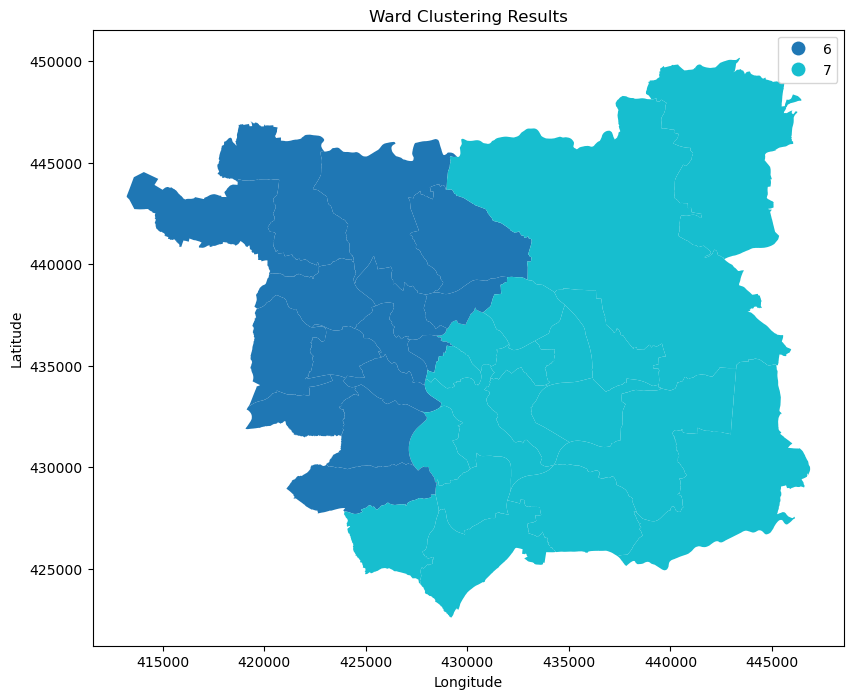

In [27]:
# 为地图中的划分结果添加新的列
def assign_cluster(x):
    clusters = [key for key, value in cluster_assignments.items() if x in value]
    if clusters:
        return clusters[0]
    else:
        return None

gdf['cluster'] = gdf['index'].apply(assign_cluster)

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='cluster', cmap='tab10', categorical=True, legend=True, ax=ax)
plt.title('Ward Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


一些区域可能没有被分配给区域中心的原因可能有几种：

约束条件：

在线性规划问题中，可能存在某些约束条件，导致某些区域无法被分配给聚类中心。例如，在这段代码中，约束条件 prob += lpSum(x[v, i] for i in V_c) == 1 要求每个区域只能被分配给一个聚类中心，这可能导致某些区域无法满足约束条件而被排除在外。
面积限制：

另一个可能的原因是，在计算平均面积大小和约束条件时，可能存在一些区域的面积太小，无法被合理地分配给任何一个聚类中心。这可能导致一些区域被排除在外。
初始条件：

KMeans 聚类算法的初始中心可能会影响最终的结果。如果初始中心选择不当，可能会导致一些区域与最近的聚类中心距离过远，无法被分配。
参数设置：

可能需要调整一些参数，例如 tau，以允许更大的面积偏差，从而使更多的区域能够被分配给聚类中心。

In [2]:
from pulp import LpProblem, LpMinimize, lpSum, LpVariable, value
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import geopandas as gpd
import numpy as np
import pandas as pd

# 读取.shp文件
shp_path = './LeedsCase/LeedsWards.shp'  # 请替换为你的.shp文件路径
gdf = gpd.read_file(shp_path)
gdf.head()


,name,WardCode,Locality,TotalPop,PoorHealth,PercPoorHe,FTStudents,PercFTStud,Aged20_24,PercAged20,Aged75Plus,PercAged75,AsianPop,PercAsianP,BlackPop,PercBlackP,Christian,PercChrist,wardarea,geometry
0,Adel and Wharfedale,E05001411,North,19430,786,4.05,535,2.75,751,3.87,2083,10.72,992,5.11,174,0.90,12614,64.92,2.923222e+07,"POLYGON ((429495.301 445295.799, 429481.901 44..."
1,Alwoodley,E05001412,North,22766,1142,5.02,747,3.28,1063,4.67,2197,9.65,3182,13.98,638,2.80,10807,47.47,1.970235e+07,"POLYGON ((428976.200 443726.900, 428975.100 44..."
2,Ardsley and Robin Hood,E05001413,South,22204,1005,4.53,509,2.29,1181,5.32,1181,5.32,480,2.16,139,0.63,13870,62.47,1.794158e+07,"POLYGON ((434340.701 425834.900, 434328.900 42..."
3,Armley,E05001414,West,25550,1614,6.32,690,2.70,2133,8.35,1547,6.05,1933,7.57,793,3.10,13243,51.83,6.076271e+06,"POLYGON ((427898.999 434093.499, 427900.300 43..."
4,Beeston and Holbeck,E05001415,West,22187,1506,6.79,665,3.00,1620,7.30,1412,6.36,2341,10.55,1223,5.51,11811,53.23,7.299516e+06,"POLYGON ((430127.801 429939.299, 430136.300 42..."


In [6]:
# 生成每个小区域的质心
gdf['centroid'] = gdf['geometry'].centroid

# 添加一个名为 index 的新列，索引值从1开始
gdf['index'] = gdf.index + 1

# 创建一个字典，将 DataFrame 转换为字典
centroid_dict = gdf.set_index('index')['centroid'].to_dict()

# print(centroid_dict)


# 将质心坐标转换为数组
centroids = np.array([(point.x, point.y) for point in gdf['centroid']])
gdf.head()

,name,WardCode,Locality,TotalPop,PoorHealth,PercPoorHe,FTStudents,PercFTStud,Aged20_24,PercAged20,...,AsianPop,PercAsianP,BlackPop,PercBlackP,Christian,PercChrist,wardarea,geometry,centroid,index
0,Adel and Wharfedale,E05001411,North,19430,786,4.05,535,2.75,751,3.87,...,992,5.11,174,0.90,12614,64.92,2.923222e+07,"POLYGON ((429495.301 445295.799, 429481.901 44...",POINT (425940.130 442831.583),1
1,Alwoodley,E05001412,North,22766,1142,5.02,747,3.28,1063,4.67,...,3182,13.98,638,2.80,10807,47.47,1.970235e+07,"POLYGON ((428976.200 443726.900, 428975.100 44...",POINT (429916.961 441140.694),2
2,Ardsley and Robin Hood,E05001413,South,22204,1005,4.53,509,2.29,1181,5.32,...,480,2.16,139,0.63,13870,62.47,1.794158e+07,"POLYGON ((434340.701 425834.900, 434328.900 42...",POINT (430501.666 425803.306),3
3,Armley,E05001414,West,25550,1614,6.32,690,2.70,2133,8.35,...,1933,7.57,793,3.10,13243,51.83,6.076271e+06,"POLYGON ((427898.999 434093.499, 427900.300 43...",POINT (426369.328 434034.125),4
4,Beeston and Holbeck,E05001415,West,22187,1506,6.79,665,3.00,1620,7.30,...,2341,10.55,1223,5.51,11811,53.23,7.299516e+06,"POLYGON ((430127.801 429939.299, 430136.300 42...",POINT (428576.593 431029.833),5
